# Klein Tunneling Probabaility

<div align="center">
  <a href="https://colab.research.google.com/github/biplab37/Graphene/blob/main/Klein_Tunneling.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" width='200'/>
  </a>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def transmission(phi,E,V,Lam,D):
    kF = 2*np.pi/Lam
    kx = kF*np.cos(phi)
    ky = kF*np.sin(phi)
    qx = np.sqrt(((E-V)/0.0658)**2 - ky**2)
    theta = np.arctan(ky/qx)
    s = np.sign(E)
    sp = np.sign(E-V)
    r = 2j*np.exp(1j*phi)*np.sin(qx*D)*(np.sin(phi) - s*sp*np.sin(theta))/(s*sp*(np.exp(-1j*qx*D)*np.cos(phi+theta) + np.exp(1j*qx*D)*np.cos(phi-theta))  - 2j*np.sin(qx*D))
    return 1 - np.abs(r)**2

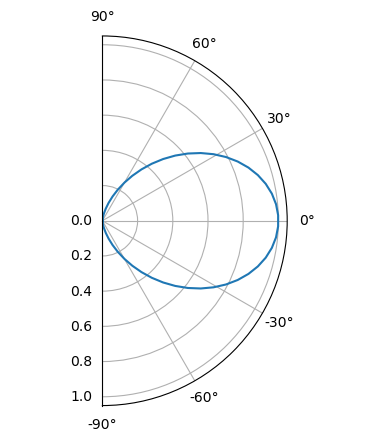

In [11]:
## Parameters,

E = 80.0 # meV
V =  285 # meV
Lam = 50 # nm
D = 100 # nm

def t(phi):
    return transmission(phi,E,V,Lam,D)

phirange = np.linspace(-np.pi,np.pi,100)
trans = np.vectorize(t)(phirange)
ax = plt.figure().add_subplot(111,polar=True)
ax.plot(phirange,trans)
ax.set_thetamax(90)
ax.set_thetamin(-90)
